## 14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

In [77]:
library(ISLR2)
library(MASS)
library(e1071)
library(class)
library(ggplot2)
library(GGally)
library(patchwork)
library(ggthemes)
library(caret)
library(skimr)
library(corrplot)

In [40]:
# Define a color cycle to use
colors <- colorblind_pal()(8)
colors

[1] "#000000" "#E69F00" "#56B4E9" "#009E73" "#F0E442" "#0072B2" "#D55E00"
[8] "#CC79A7"

In [14]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [11]:
str(Auto)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [15]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.0   1st Qu.: 75.0   1st Qu.:2223  
 Median :23.00   Median :4.000   Median :146.0   Median : 93.5   Median :2800  
 Mean   :23.52   Mean   :5.458   Mean   :193.5   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3609  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :5                     
  acceleration        year           origin                  name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.80   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.56   Mean   :75.99   Mean   :1.574   toyota corolla:  5  
 3rd Qu.:1

In [20]:
skim(Auto)

── Data Summary ────────────────────────
                           Values
Name                       Auto  
Number of rows             397   
Number of columns          9     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 name                  0             1 FALSE        304
  top_counts                    
1 for: 6, amc: 5, for: 5, toy: 5

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
1 mpg                   0         1       23.5    7.83      9   17.5   23  
2 cylinders             0         1        5.46   1.70      3    4      4  
3 displacement          0         1      194.  

In [61]:
data <- na.omit(Auto)
head(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [62]:
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             392   
Number of columns          9     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 name                  0             1 FALSE        301
  top_counts                    
1 amc: 5, for: 5, toy: 5, amc: 4

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
1 mpg                   0             1   23.4    7.81      9   17     22.8
2 cylinders             0             1    5.47   1.71      3    4      4  
3 displacement          0             1  194.  

(a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. 
You can compute the median using the `median()` function. 
Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [63]:
data$mpg01 <- data$mpg > median(data$mpg)
head(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<lgl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,FALSE
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,FALSE
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,FALSE
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,FALSE
5,17,8,302,140,3449,10.5,70,1,ford torino,FALSE
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,FALSE


(b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. 
Which of the other features seem most likely to be useful in predicting `mpg01`? 
Scatterplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



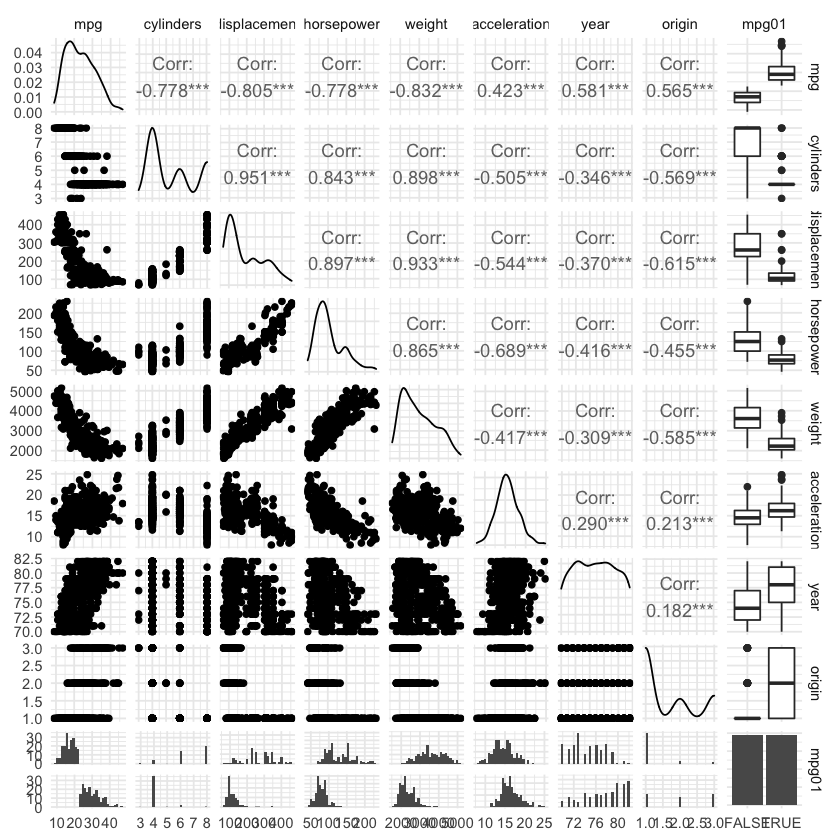

In [64]:
ggpairs(data[, -9]) + theme_minimal()# theme_fivethirtyeight()

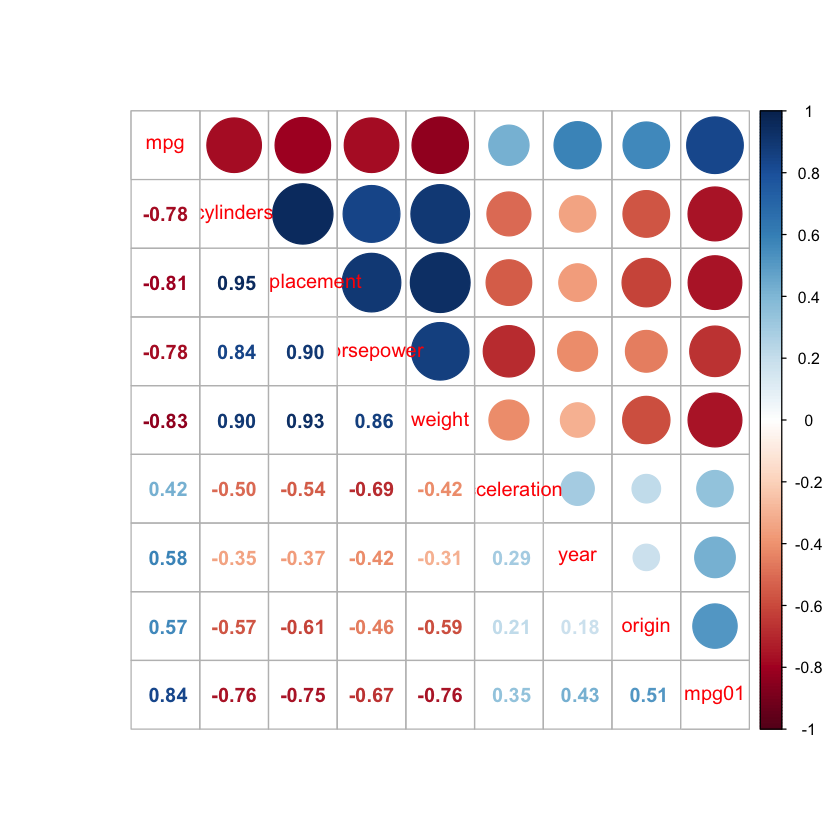

In [65]:
corrplot.mixed(cor(data[, -9]))

Warning message in stack.data.frame(data):
“non-vector columns will be ignored”


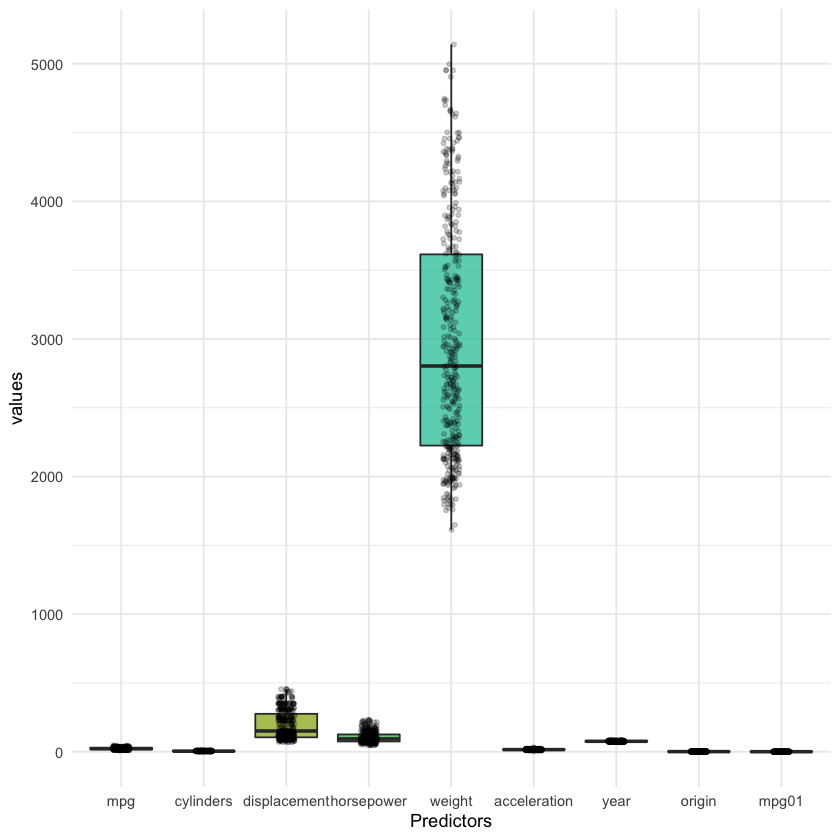

In [66]:
ggplot(stack(data), aes(x = ind, y = values, fill = ind)) +
    geom_boxplot(alpha = 0.7, outlier.alpha = 0.1, show.legend = FALSE) +
    geom_jitter(
        height = 0,
        width = 0.1,
        alpha = 0.2,
        size = 1.0,
        colour = colors[1],
        show.legend = FALSE) +
    xlab("Predictors") +
    theme_minimal()

In order to predit `mpg01` it seems that those that can be associated with it are `mpg`, `cylinders`, `displacement`, `horsepower` and `weight`.

(c) Split the data into a training set and a test set.

In [99]:
train_test_split <- function(
    df, target,
    proportion_train = 0.7, seed = 123, return_list = TRUE
    ) {
        # Set seed
        set.seed(seed)
        # Step 1: Get row numbers for the training data
        train_row_numbers <- createDataPartition(
            df[, target], p = proportion_train, list = return_list
        )
        return(train_row_numbers)
}


In [56]:
dim(data)

[1] 392  10

The data set its quite small so we will split 60% into train set and 40% into test set.

In [102]:
train_observations <- train_test_split(
    data, "mpg01", seed = 123, proportion_train = 0.6, return_list = FALSE
)

In [103]:
dim(data[train_observations, ])
dim(data[-train_observations, ])

[1] 236  10

[1] 156  10

(d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [105]:
predictors <- c("mpg", "cylinders", "displacement", "horsepower", "weight")
predictors

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"

In [104]:
lda_fit <- lda(
    mpg01 ~ mpg + cylinders + displacement + horsepower + weight,
    data = data,
    family = "binomial",
    subset = train_observations
)

lda_fit

Call:
lda(mpg01 ~ mpg + cylinders + displacement + horsepower + weight, 
    data = data, family = "binomial", subset = train_observations)

Prior probabilities of groups:
FALSE  TRUE 
  0.5   0.5 

Group means:
           mpg cylinders displacement horsepower   weight
FALSE 16.97203  6.796610     272.7797  129.67797 3583.924
TRUE  29.43559  4.254237     119.2331   80.63559 2367.186

Coefficients of linear discriminants:
                       LD1
mpg           0.2090048370
cylinders    -0.4065797052
displacement -0.0030257417
horsepower    0.0123292660
weight        0.0001362026

In [120]:
# Let's calculate the train accuracy
lda_train_pred <- predict(lda_fit, data[train_observations, predictors])
lda_train_accuracy <- mean(lda_train_pred$class == data[train_observations, "mpg01"]) # Accuracy

In [126]:
# And the test accuracy
lda_test_pred <- predict(lda_fit, data[- train_observations, predictors])
names(lda_test_pred)

[1] "class"     "posterior" "x"

In [127]:
lda_test_class <- lda_test_pred$class
table(lda_test_class, data[-train_observations, "mpg01"])

              
lda_test_class FALSE TRUE
         FALSE    69    0
         TRUE      9   78

In [128]:
lda_test_accuracy <- mean(lda_test_class == data[-train_observations, "mpg01"]) # Accuracy

In [130]:
cat("Train accuracy: ", lda_train_accuracy, "\n")
cat("Test accuracy: ", lda_test_accuracy, "\n")
cat("Train error: ", 1.0 - lda_train_accuracy, "\n")
cat("Test error: ", 1.0 - lda_test_accuracy)

Train accuracy:  0.9449153 
Test accuracy:  0.9423077 
Train error:  0.05508475 
Test error:  0.05769231

(e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [131]:
qda_fit <- qda(
    mpg01 ~ mpg + cylinders + displacement + horsepower + weight,
    data = data,
    family = "binomial",
    subset = train_observations
)

qda_fit

Call:
qda(mpg01 ~ mpg + cylinders + displacement + horsepower + weight, 
    data = data, family = "binomial", subset = train_observations)

Prior probabilities of groups:
FALSE  TRUE 
  0.5   0.5 

Group means:
           mpg cylinders displacement horsepower   weight
FALSE 16.97203  6.796610     272.7797  129.67797 3583.924
TRUE  29.43559  4.254237     119.2331   80.63559 2367.186

In [132]:
# Let's calculate the train accuracy
qda_train_pred <- predict(qda_fit, data[train_observations, predictors])
qda_train_accuracy <- mean(qda_train_pred$class == data[train_observations, "mpg01"]) # Accuracy

In [135]:
# And the test accuracy
qda_test_pred <- predict(qda_fit, data[-train_observations, predictors])
names(lda_test_pred)

qda_test_class <- qda_test_pred$class
table(qda_test_class, data[-train_observations, "mpg01"])

qda_test_accuracy <- mean(qda_test_class == data[-train_observations, "mpg01"]) # Accuracy

[1] "class"     "posterior" "x"

              
qda_test_class FALSE TRUE
         FALSE    68    1
         TRUE     10   77

In [136]:
cat("Train accuracy: ", qda_train_accuracy, "\n")
cat("Test accuracy: ", qda_test_accuracy, "\n")
cat("Train error: ", 1.0 - qda_train_accuracy, "\n")
cat("Test error: ", 1.0 - qda_test_accuracy)

Train accuracy:  0.940678 
Test accuracy:  0.9294872 
Train error:  0.05932203 
Test error:  0.07051282

(f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [138]:
logreg <- glm(
    mpg01 ~ mpg + cylinders + displacement + horsepower + weight,
    data = data,
    family = "binomial",
    subset = train_observations
)
summary(logreg)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = mpg01 ~ mpg + cylinders + displacement + horsepower + 
    weight, family = "binomial", data = data, subset = train_observations)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.425e-04  -2.100e-08   0.000e+00   2.100e-08   1.943e-04  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)  -1.116e+03  2.462e+05  -0.005    0.996
mpg           5.189e+01  6.817e+03   0.008    0.994
cylinders    -1.021e+00  5.409e+04   0.000    1.000
displacement  1.681e-01  9.141e+02   0.000    1.000
horsepower    1.290e-01  1.631e+03   0.000    1.000
weight       -3.244e-02  1.514e+01  -0.002    0.998

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3.2717e+02  on 235  degrees of freedom
Residual deviance: 1.4239e-07  on 230  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


In [140]:
# Let's calculate the train accuracy
logreg_train_pred <- predict(logreg, data[train_observations, predictors])
logreg_train_accuracy <- mean(logreg_train_pred == data[train_observations, "mpg01"]) # Accuracy

In [145]:
# And the test accuracy
logreg_test_probs <- predict(logreg, data[-train_observations, predictors], type = "response")

logreg_test_pred <- rep(FALSE, nrow(data[-train_observations, ]))
logreg_test_pred[logreg_test_probs > 0.5] <- TRUE
table(logreg_test_pred, data[-train_observations, "mpg01"])

logreg_test_accuracy <- mean(logreg_test_pred == data[-train_observations, "mpg01"]) # Accuracy

                
logreg_test_pred FALSE TRUE
           FALSE    78    0
           TRUE      0   78

In [146]:
cat("Train accuracy: ", logreg_train_accuracy, "\n")
cat("Test accuracy: ", logreg_test_accuracy, "\n")
cat("Train error: ", 1.0 - logreg_train_accuracy, "\n")
cat("Test error: ", 1.0 - logreg_test_accuracy)

Train accuracy:  0 
Test accuracy:  1 
Train error:  1 
Test error:  0

(g) Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [147]:
nb_fit <- naiveBayes(
    mpg01 ~ mpg + cylinders + displacement + horsepower + weight,
    data = data,
    family = "binomial",
    subset = train_observations
)

nb_fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, family = "binomial")

A-priori probabilities:
Y
FALSE  TRUE 
  0.5   0.5 

Conditional probabilities:
       mpg
Y           [,1]     [,2]
  FALSE 16.97203 3.076819
  TRUE  29.43559 4.945265

       cylinders
Y           [,1]      [,2]
  FALSE 6.796610 1.3559576
  TRUE  4.254237 0.8184459

       displacement
Y           [,1]     [,2]
  FALSE 272.7797 87.45941
  TRUE  119.2331 45.13199

       horsepower
Y            [,1]     [,2]
  FALSE 129.67797 37.95001
  TRUE   80.63559 16.24474

       weight
Y           [,1]     [,2]
  FALSE 3583.924 664.1841
  TRUE  2367.186 424.9824


In [148]:
# Let's calculate the train accuracy
nb_train_pred <- predict(nb_fit, data[train_observations, predictors])
nb_train_accuracy <- mean(nb_train_pred == data[train_observations, "mpg01"]) # Accuracy

In [150]:
# And the test accuracy
nb_test_pred <- predict(nb_fit, data[-train_observations, predictors])
table(nb_test_pred, data[-train_observations, "mpg01"])

nb_test_accuracy <- mean(nb_test_pred == data[-train_observations, "mpg01"]) # Accuracy

            
nb_test_pred FALSE TRUE
       FALSE    65    1
       TRUE     13   77

In [151]:
cat("Train accuracy: ", nb_train_accuracy, "\n")
cat("Test accuracy: ", nb_test_accuracy, "\n")
cat("Train error: ", 1.0 - nb_train_accuracy, "\n")
cat("Test error: ", 1.0 - nb_test_accuracy)

Train accuracy:  0.9279661 
Test accuracy:  0.9102564 
Train error:  0.0720339 
Test error:  0.08974359

(h) Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [157]:
set.seed(1)
knn_pred_1 <- knn(
    data[train_observations, predictors],
    data[-train_observations, predictors],
    data[train_observations, "mpg01"],
    k = 1
)

table(knn_pred_1, data[-train_observations, "mpg01"])
knn_accuracy_1 <- mean(knn_pred_1 == data[-train_observations, "mpg01"])
knn_accuracy_1

          
knn_pred_1 FALSE TRUE
     FALSE    67    5
     TRUE     11   73

[1] 0.8974359

In [158]:
knn_pred_3 <- knn(
    data[train_observations, predictors],
    data[-train_observations, predictors],
    data[train_observations, "mpg01"],
    k = 3
)

table(knn_pred_3, data[-train_observations, "mpg01"])
knn_accuracy_3 <- mean(knn_pred_3 == data[-train_observations, "mpg01"])
knn_accuracy_3

          
knn_pred_3 FALSE TRUE
     FALSE    69    7
     TRUE      9   71

[1] 0.8974359

In [159]:
knn_pred_7 <- knn(
    data[train_observations, predictors],
    data[-train_observations, predictors],
    data[train_observations, "mpg01"],
    k = 7
)

table(knn_pred_7, data[-train_observations, "mpg01"])
knn_accuracy_7 <- mean(knn_pred_7 == data[-train_observations, "mpg01"])
knn_accuracy_7

          
knn_pred_7 FALSE TRUE
     FALSE    69    7
     TRUE      9   71

[1] 0.8974359

In [160]:
knn_pred_10 <- knn(
    data[train_observations, predictors],
    data[-train_observations, predictors],
    data[train_observations, "mpg01"],
    k = 10
)

table(knn_pred_10, data[-train_observations, "mpg01"])
knn_accuracy_10 <- mean(knn_pred_10 == data[-train_observations, "mpg01"])
knn_accuracy_10

           
knn_pred_10 FALSE TRUE
      FALSE    66    5
      TRUE     12   73

[1] 0.8910256